In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from sympy import *

In [2]:
#rosenbrock
def rosenbrock(z):
    """ Return a scaler of values for the Rosenbrock function.
        Assume that z is a 2D point  
    """
    val = 100*(z[1]-z[0]**2)**2+(1-z[0])**2
    return val# compute the Rosenbrock function value
rosenbrock((-1,1))

4

In [ ]:
def rosenfunc(z):
    a,b = z[0],z[1]
    return 100*(b-a**2)**2+(1-a)**2

In [12]:
def gradient(function,z):
    """Returns a 2D array gradient values
       for the function at point z.
    """
    a,b = symbols('a b')
    y = function
    da = diff(y,a)
    db = diff(y,b)
    funa = lambdify((a,b), da)
    funb = lambdify((a,b), db)
    a = z[0]
    b = z[1]
    res = np.zeros(2)
    res[0] = funa(a,b)
    res[1] = funb(a,b)
    return res
    

In [4]:
#rosenbrock
f = lambda x: (100*(x[1]-x[0]**2)**2 + (1-x[0])**2)
dfx1 = lambda x: (400*x[0]**3-400*x[0]*x[1]+ 2*x[0] - 2)
dfx2 = lambda x: (200*(x[1]-x[0]**2))
d2fx1 =lambda x: (1200*x[0]**2-400*x[1] + 2)
d2fx1x2 = d2fx2x1 =lambda x: (-400*x[0])
d2fx2 = lambda x: (200)

In [33]:
#f = 100*(b-a**2)**2+(1-a)**2
#gradient(f,[1,2])
#仅用于steepest descent为pk
def backtrack(xk, dfx1, dfx2, alpha, c, ro, count):
    while (f(xk) - f(xk - alpha*np.array([dfx1(xk), dfx2(xk)])) - 
           c * alpha * np.dot(np.array([dfx1(xk), dfx2(xk)]), np.array([dfx1(xk), dfx2(xk)]))) < 0:
        alpha *= ro
        print("""###########################   iteration {}   ###########################""".format(count))
        print("step length", alpha)
        count += 1
    return alpha

In [8]:
#适用于不同pk值得进化版
def backtrack(xk, dfx1, dfx2, alpha, c, ro, pk):
    count = 0
    ma = 20
    while (f(xk) - f(xk + alpha*pk) + 
           c * alpha * np.dot(np.array([dfx1(xk), dfx2(xk)]),pk)) < 0 or count > ma:
        alpha *= ro
        #print("""###########################   iteration {}   ###########################""".format(count))
        #print("step length", alpha)
        count += 1
    return alpha

In [147]:
#set theta0 equals to a value
def grad(data,theta,the0):
    t_1,t_2 = symbols("t_1 t_2") 
    #j = 0
    j_1 = 0
    j_2 = 0
    theta0 = np.array((1,-1))
    fx = np.dot(data,theta0)
    ey = np.sign(fx)
    for i in range(50):
        y = ey[i]
        x_1,x_2 = data[i,:]
        l = log(1+e**(-y*(the0+t_1*x_1+t_2*x_2)))
        dd1 = diff(l,t_1)
        j_1+=dd1
        dd2 = diff(l,t_2)
        j_2+=dd2
    fun1 = lambdify((t_1, t_2), j_1)
    fun2 = lambdify((t_1, t_2), j_2)
    t_1,t_2 = theta[0],theta[1]
    res = np.zeros(2)
    res[0] = fun1(t_1,t_2)
    res[1] = fun2(t_1,t_2)
    return res,fun1,fun2
data = np.ones(100)
data = np.reshape(data,(50,2))
np.random.seed(1)
num = np.random.randn(50,2)
data[:,:] = num
theta = np.array((1,-1))
#fx = np.dot(data,theta)
#ey = np.sign(fx)
grad(data,theta,0.5)[2]

<function _lambdifygenerated(t_1, t_2)>

In [279]:
theta0 = np.array((1,-1))
fx = np.dot(data,theta0)
ey = np.sign(fx)
ind = np.arange(50)
np.random.seed(3)
indd3 = np.random.choice(ind, 5)
ey[indd3] = -ey[indd3]
def logre(data,theta,the0):
    t_1,t_2 = symbols("t_1 t_2") 
    logre = 0
    for i in range(50):
        y = ey[i]
        x_1,x_2 = data[i,:]
        l = log(1+e**(-y*(the0+t_1*x_1+t_2*x_2)))
        logre += l
    fun = lambdify((t_1, t_2), logre)
    t_1,t_2 = theta[0],theta[1]
    res = np.array([fun(t_1,t_2)])
    return res, fun
logre(data,theta,0.5)

(array([27.05207073]), <function _lambdifygenerated(t_1, t_2)>)

In [266]:
def hessian(ey,data,theta):
    t_1,t_2 = symbols("t_1 t_2") 
    h11 = 0
    h12 = 0
    h21 = 0
    h22 = 0
    for i in range(50):
        y = ey[i]
        x_1,x_2 = data[i,:]
        l = log(1+e**(-y*(the0+t_1*x_1+t_2*x_2)))
        dd1 = diff(l,t_1)
        ddd11 = diff(dd1,t_1)
        ddd12 = diff(dd1,t_2)
        h11+=ddd11
        h12+=ddd12
        dd2 = diff(l,t_2)
        ddd21 = diff(dd2,t_1)
        ddd22 = diff(dd2,t_2)
        h21+=ddd21
        h22+=ddd22    
    hh11 = lambdify((t_1, t_2), h11)
    hh12 = lambdify((t_1, t_2), h12)
    hh21 = lambdify((t_1, t_2), h21)
    hh22 = lambdify((t_1, t_2), h22)
    t_1,t_2 = theta[0],theta[1]
    hres = np.zeros((2,2))
    c = 0
    funl = [hh11,hh12,hh21,hh22]
    for i in range(2):
        for j in range(2):
            func = funl[c]
            hres[i,j] = func(t_1,t_2)
            c+=1
    return hres, h11,h12,h21,h22

In [267]:
hessian(ey,data,theta)

In [ ]:
#尝试用flambda的方法
logf = lambda t_1,t_2: (log(2.71828182845905**(-2.18557540653316*t_1 + 1.39649633548814*t_2 - 0.5) + 1) + log(2.71828182845905**(-1.74481176421648*t_1 + 0.761206900895103*t_2 - 0.5) + 1) + log(2.71828182845905**(-1.65980217710987*t_1 - 0.742044160577336*t_2 - 0.5) + 1) + log(2.71828182845905**(-1.62434536366324*t_1 + 0.611756413650075*t_2 - 0.5) + 1) + log(2.71828182845905**(-1.46210793704497*t_1 + 2.06014070949765*t_2 - 0.5) + 1) + log(2.71828182845905**(-1.44411380542959*t_1 - 0.504465862946451*t_2 + 0.5) + 1) + log(2.71828182845905**(-1.19891787990151*t_1 - 0.185156417483944*t_2 - 0.5) + 1) + log(2.71828182845905**(-1.14251819802214*t_1 - 0.349342722412878*t_2 + 0.5) + 1) + log(2.71828182845905**(-1.13376944233544*t_1 + 1.09989126731403*t_2 - 0.5) + 1) + log(2.71828182845905**(-1.11731034863528*t_1 + 0.234415697817092*t_2 + 0.5) + 1) + log(2.71828182845905**(-1.10061917721292*t_1 + 1.14472370983961*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.901590720592796*t_1 - 0.502494338901868*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.900855949264412*t_1 + 0.683727859174333*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.865407629324679*t_1 + 2.30153869688028*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.754397940996653*t_1 + 1.25286815523329*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.747158293750838*t_1 + 1.69245460102775*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.691660751725309*t_1 - 0.396753526855977*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.671246130836819*t_1 - 0.0126645989189014*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.670662286289031*t_1 + 0.377563786320919*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.620000843948129*t_1 + 0.698032034072219*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.512929820418009*t_1 + 0.298092835102716*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.488518146537497*t_1 + 0.0755717130210557*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.423494354064113*t_1 - 0.0773400683485594*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.343853675571076*t_1 + 0.0435968568342469*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.319039096057099*t_1 + 0.24937037547741*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.315634947241605*t_1 + 2.022201215824*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.306204012628372*t_1 + 0.827974642607246*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.300170319955827*t_1 + 0.352249846493519*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.267888079626016*t_1 + 0.530355466738186*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.222328142610359*t_1 - 0.200758068929997*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.208894233374778*t_1 + 0.586623191182198*t_2 + 0.5) + 1) + log(2.71828182845905**(-0.19829972012677*t_1 - 0.119008645807459*t_2 - 0.5) + 1) + log(2.71828182845905**(-0.050807754776029*t_1 + 0.636995646569353*t_2 - 0.5) + 1) + log(2.71828182845905**(0.0422137467155928*t_1 + 0.582815213715822*t_2 + 0.5) + 1) + log(2.71828182845905**(0.120158952481629*t_1 + 0.617203109707419*t_2 + 0.5) + 1) + log(2.71828182845905**(0.121821270991437*t_1 + 1.12948390791192*t_2 + 0.5) + 1) + log(2.71828182845905**(0.122890225518648*t_1 + 0.935769434259069*t_2 - 0.5) + 1) + log(2.71828182845905**(0.16003706944783*t_1 + 0.876168921116225*t_2 + 0.5) + 1) + log(2.71828182845905**(0.172428207550436*t_1 + 0.877858417921372*t_2 - 0.5) + 1) + log(2.71828182845905**(0.186561390988284*t_1 + 0.410051647208256*t_2 + 0.5) + 1) + log(2.71828182845905**(0.190915484667466*t_1 + 2.10025513647884*t_2 + 0.5) + 1) + log(2.71828182845905**(0.191835552361615*t_1 + 0.887628964084836*t_2 - 0.5) + 1) + log(2.71828182845905**(0.230094735364383*t_1 + 0.762011180312025*t_2 + 0.5) + 1) + log(2.71828182845905**(0.285587325254259*t_1 + 0.885141164270728*t_2 + 0.5) + 1) + log(2.71828182845905**(0.322417204013507*t_1 + 0.384054354668416*t_2 - 0.5) + 1) + log(2.71828182845905**(0.375284950090114*t_1 + 0.638730407454222*t_2 - 0.5) + 1) + log(2.71828182845905**(0.528171752263456*t_1 + 1.07296862215617*t_2 - 0.5) + 1) + log(2.71828182845905**(0.687172700119599*t_1 + 0.84520564149872*t_2 - 0.5) + 1) + log(2.71828182845905**(0.838983413874505*t_1 + 0.931102081303557*t_2 + 0.5) + 1) + log(2.71828182845905**(1.13162938745143*t_1 + 1.5198168164222*t_2 + 0.5) + 1))
logdfx1 = lambda t_1,t_2: (-2.18557540653316*2.71828182845905**(-2.18557540653316*t_1 + 1.39649633548814*t_2 - 0.5)/(2.71828182845905**(-2.18557540653316*t_1 + 1.39649633548814*t_2 - 0.5) + 1) - 1.74481176421648*2.71828182845905**(-1.74481176421648*t_1 + 0.761206900895103*t_2 - 0.5)/(2.71828182845905**(-1.74481176421648*t_1 + 0.761206900895103*t_2 - 0.5) + 1) - 1.65980217710987*2.71828182845905**(-1.65980217710987*t_1 - 0.742044160577336*t_2 - 0.5)/(2.71828182845905**(-1.65980217710987*t_1 - 0.742044160577336*t_2 - 0.5) + 1) - 1.62434536366324*2.71828182845905**(-1.62434536366324*t_1 + 0.611756413650075*t_2 - 0.5)/(2.71828182845905**(-1.62434536366324*t_1 + 0.611756413650075*t_2 - 0.5) + 1) - 1.46210793704497*2.71828182845905**(-1.46210793704497*t_1 + 2.06014070949765*t_2 - 0.5)/(2.71828182845905**(-1.46210793704497*t_1 + 2.06014070949765*t_2 - 0.5) + 1) - 1.44411380542959*2.71828182845905**(-1.44411380542959*t_1 - 0.504465862946451*t_2 + 0.5)/(2.71828182845905**(-1.44411380542959*t_1 - 0.504465862946451*t_2 + 0.5) + 1) - 1.19891787990151*2.71828182845905**(-1.19891787990151*t_1 - 0.185156417483944*t_2 - 0.5)/(2.71828182845905**(-1.19891787990151*t_1 - 0.185156417483944*t_2 - 0.5) + 1) - 1.14251819802214*2.71828182845905**(-1.14251819802214*t_1 - 0.349342722412878*t_2 + 0.5)/(2.71828182845905**(-1.14251819802214*t_1 - 0.349342722412878*t_2 + 0.5) + 1) - 1.13376944233544*2.71828182845905**(-1.13376944233544*t_1 + 1.09989126731403*t_2 - 0.5)/(2.71828182845905**(-1.13376944233544*t_1 + 1.09989126731403*t_2 - 0.5) + 1) - 1.11731034863528*2.71828182845905**(-1.11731034863528*t_1 + 0.234415697817092*t_2 + 0.5)/(2.71828182845905**(-1.11731034863528*t_1 + 0.234415697817092*t_2 + 0.5) + 1) - 1.10061917721292*2.71828182845905**(-1.10061917721292*t_1 + 1.14472370983961*t_2 + 0.5)/(2.71828182845905**(-1.10061917721292*t_1 + 1.14472370983961*t_2 + 0.5) + 1) - 0.901590720592796*2.71828182845905**(-0.901590720592796*t_1 - 0.502494338901868*t_2 - 0.5)/(2.71828182845905**(-0.901590720592796*t_1 - 0.502494338901868*t_2 - 0.5) + 1) - 0.900855949264412*2.71828182845905**(-0.900855949264412*t_1 + 0.683727859174333*t_2 - 0.5)/(2.71828182845905**(-0.900855949264412*t_1 + 0.683727859174333*t_2 - 0.5) + 1) - 0.865407629324679*2.71828182845905**(-0.865407629324679*t_1 + 2.30153869688028*t_2 - 0.5)/(2.71828182845905**(-0.865407629324679*t_1 + 2.30153869688028*t_2 - 0.5) + 1) - 0.754397940996653*2.71828182845905**(-0.754397940996653*t_1 + 1.25286815523329*t_2 + 0.5)/(2.71828182845905**(-0.754397940996653*t_1 + 1.25286815523329*t_2 + 0.5) + 1) - 0.747158293750838*2.71828182845905**(-0.747158293750838*t_1 + 1.69245460102775*t_2 + 0.5)/(2.71828182845905**(-0.747158293750838*t_1 + 1.69245460102775*t_2 + 0.5) + 1) - 0.691660751725309*2.71828182845905**(-0.691660751725309*t_1 - 0.396753526855977*t_2 + 0.5)/(2.71828182845905**(-0.691660751725309*t_1 - 0.396753526855977*t_2 + 0.5) + 1) - 0.671246130836819*2.71828182845905**(-0.671246130836819*t_1 - 0.0126645989189014*t_2 + 0.5)/(2.71828182845905**(-0.671246130836819*t_1 - 0.0126645989189014*t_2 + 0.5) + 1) - 0.670662286289031*2.71828182845905**(-0.670662286289031*t_1 + 0.377563786320919*t_2 + 0.5)/(2.71828182845905**(-0.670662286289031*t_1 + 0.377563786320919*t_2 + 0.5) + 1) - 0.620000843948129*2.71828182845905**(-0.620000843948129*t_1 + 0.698032034072219*t_2 + 0.5)/(2.71828182845905**(-0.620000843948129*t_1 + 0.698032034072219*t_2 + 0.5) + 1) - 0.512929820418009*2.71828182845905**(-0.512929820418009*t_1 + 0.298092835102716*t_2 - 0.5)/(2.71828182845905**(-0.512929820418009*t_1 + 0.298092835102716*t_2 - 0.5) + 1) - 0.488518146537497*2.71828182845905**(-0.488518146537497*t_1 + 0.0755717130210557*t_2 - 0.5)/(2.71828182845905**(-0.488518146537497*t_1 + 0.0755717130210557*t_2 - 0.5) + 1) - 0.423494354064113*2.71828182845905**(-0.423494354064113*t_1 - 0.0773400683485594*t_2 - 0.5)/(2.71828182845905**(-0.423494354064113*t_1 - 0.0773400683485594*t_2 - 0.5) + 1) - 0.343853675571076*2.71828182845905**(-0.343853675571076*t_1 + 0.0435968568342469*t_2 + 0.5)/(2.71828182845905**(-0.343853675571076*t_1 + 0.0435968568342469*t_2 + 0.5) + 1) - 0.319039096057099*2.71828182845905**(-0.319039096057099*t_1 + 0.24937037547741*t_2 - 0.5)/(2.71828182845905**(-0.319039096057099*t_1 + 0.24937037547741*t_2 - 0.5) + 1) - 0.315634947241605*2.71828182845905**(-0.315634947241605*t_1 + 2.022201215824*t_2 - 0.5)/(2.71828182845905**(-0.315634947241605*t_1 + 2.022201215824*t_2 - 0.5) + 1) - 0.306204012628372*2.71828182845905**(-0.306204012628372*t_1 + 0.827974642607246*t_2 + 0.5)/(2.71828182845905**(-0.306204012628372*t_1 + 0.827974642607246*t_2 + 0.5) + 1) - 0.300170319955827*2.71828182845905**(-0.300170319955827*t_1 + 0.352249846493519*t_2 - 0.5)/(2.71828182845905**(-0.300170319955827*t_1 + 0.352249846493519*t_2 - 0.5) + 1) - 0.267888079626016*2.71828182845905**(-0.267888079626016*t_1 + 0.530355466738186*t_2 + 0.5)/(2.71828182845905**(-0.267888079626016*t_1 + 0.530355466738186*t_2 + 0.5) + 1) - 0.222328142610359*2.71828182845905**(-0.222328142610359*t_1 - 0.200758068929997*t_2 + 0.5)/(2.71828182845905**(-0.222328142610359*t_1 - 0.200758068929997*t_2 + 0.5) + 1) - 0.208894233374778*2.71828182845905**(-0.208894233374778*t_1 + 0.586623191182198*t_2 + 0.5)/(2.71828182845905**(-0.208894233374778*t_1 + 0.586623191182198*t_2 + 0.5) + 1) - 0.19829972012677*2.71828182845905**(-0.19829972012677*t_1 - 0.119008645807459*t_2 - 0.5)/(2.71828182845905**(-0.19829972012677*t_1 - 0.119008645807459*t_2 - 0.5) + 1) - 0.050807754776029*2.71828182845905**(-0.050807754776029*t_1 + 0.636995646569353*t_2 - 0.5)/(2.71828182845905**(-0.050807754776029*t_1 + 0.636995646569353*t_2 - 0.5) + 1) + 0.0422137467155928*2.71828182845905**(0.0422137467155928*t_1 + 0.582815213715822*t_2 + 0.5)/(2.71828182845905**(0.0422137467155928*t_1 + 0.582815213715822*t_2 + 0.5) + 1) + 0.120158952481629*2.71828182845905**(0.120158952481629*t_1 + 0.617203109707419*t_2 + 0.5)/(2.71828182845905**(0.120158952481629*t_1 + 0.617203109707419*t_2 + 0.5) + 1) + 0.121821270991437*2.71828182845905**(0.121821270991437*t_1 + 1.12948390791192*t_2 + 0.5)/(2.71828182845905**(0.121821270991437*t_1 + 1.12948390791192*t_2 + 0.5) + 1) + 0.122890225518648*2.71828182845905**(0.122890225518648*t_1 + 0.935769434259069*t_2 - 0.5)/(2.71828182845905**(0.122890225518648*t_1 + 0.935769434259069*t_2 - 0.5) + 1) + 0.16003706944783*2.71828182845905**(0.16003706944783*t_1 + 0.876168921116225*t_2 + 0.5)/(2.71828182845905**(0.16003706944783*t_1 + 0.876168921116225*t_2 + 0.5) + 1) + 0.172428207550436*2.71828182845905**(0.172428207550436*t_1 + 0.877858417921372*t_2 - 0.5)/(2.71828182845905**(0.172428207550436*t_1 + 0.877858417921372*t_2 - 0.5) + 1) + 0.186561390988284*2.71828182845905**(0.186561390988284*t_1 + 0.410051647208256*t_2 + 0.5)/(2.71828182845905**(0.186561390988284*t_1 + 0.410051647208256*t_2 + 0.5) + 1) + 0.190915484667466*2.71828182845905**(0.190915484667466*t_1 + 2.10025513647884*t_2 + 0.5)/(2.71828182845905**(0.190915484667466*t_1 + 2.10025513647884*t_2 + 0.5) + 1) + 0.191835552361615*2.71828182845905**(0.191835552361615*t_1 + 0.887628964084836*t_2 - 0.5)/(2.71828182845905**(0.191835552361615*t_1 + 0.887628964084836*t_2 - 0.5) + 1) + 0.230094735364383*2.71828182845905**(0.230094735364383*t_1 + 0.762011180312025*t_2 + 0.5)/(2.71828182845905**(0.230094735364383*t_1 + 0.762011180312025*t_2 + 0.5) + 1) + 0.285587325254259*2.71828182845905**(0.285587325254259*t_1 + 0.885141164270728*t_2 + 0.5)/(2.71828182845905**(0.285587325254259*t_1 + 0.885141164270728*t_2 + 0.5) + 1) + 0.322417204013507*2.71828182845905**(0.322417204013507*t_1 + 0.384054354668416*t_2 - 0.5)/(2.71828182845905**(0.322417204013507*t_1 + 0.384054354668416*t_2 - 0.5) + 1) + 0.375284950090114*2.71828182845905**(0.375284950090114*t_1 + 0.638730407454222*t_2 - 0.5)/(2.71828182845905**(0.375284950090114*t_1 + 0.638730407454222*t_2 - 0.5) + 1) + 0.528171752263456*2.71828182845905**(0.528171752263456*t_1 + 1.07296862215617*t_2 - 0.5)/(2.71828182845905**(0.528171752263456*t_1 + 1.07296862215617*t_2 - 0.5) + 1) + 0.687172700119599*2.71828182845905**(0.687172700119599*t_1 + 0.84520564149872*t_2 - 0.5)/(2.71828182845905**(0.687172700119599*t_1 + 0.84520564149872*t_2 - 0.5) + 1) + 0.838983413874505*2.71828182845905**(0.838983413874505*t_1 + 0.931102081303557*t_2 + 0.5)/(2.71828182845905**(0.838983413874505*t_1 + 0.931102081303557*t_2 + 0.5) + 1) + 1.13162938745143*2.71828182845905**(1.13162938745143*t_1 + 1.5198168164222*t_2 + 0.5)/(2.71828182845905**(1.13162938745143*t_1 + 1.5198168164222*t_2 + 0.5) + 1))
logdfx2 = lambda t_1,t_2: (1.39649633548814*2.71828182845905**(-2.18557540653316*t_1 + 1.39649633548814*t_2 - 0.5)/(2.71828182845905**(-2.18557540653316*t_1 + 1.39649633548814*t_2 - 0.5) + 1) + 0.761206900895103*2.71828182845905**(-1.74481176421648*t_1 + 0.761206900895103*t_2 - 0.5)/(2.71828182845905**(-1.74481176421648*t_1 + 0.761206900895103*t_2 - 0.5) + 1) - 0.742044160577336*2.71828182845905**(-1.65980217710987*t_1 - 0.742044160577336*t_2 - 0.5)/(2.71828182845905**(-1.65980217710987*t_1 - 0.742044160577336*t_2 - 0.5) + 1) + 0.611756413650075*2.71828182845905**(-1.62434536366324*t_1 + 0.611756413650075*t_2 - 0.5)/(2.71828182845905**(-1.62434536366324*t_1 + 0.611756413650075*t_2 - 0.5) + 1) + 2.06014070949765*2.71828182845905**(-1.46210793704497*t_1 + 2.06014070949765*t_2 - 0.5)/(2.71828182845905**(-1.46210793704497*t_1 + 2.06014070949765*t_2 - 0.5) + 1) - 0.504465862946451*2.71828182845905**(-1.44411380542959*t_1 - 0.504465862946451*t_2 + 0.5)/(2.71828182845905**(-1.44411380542959*t_1 - 0.504465862946451*t_2 + 0.5) + 1) - 0.185156417483944*2.71828182845905**(-1.19891787990151*t_1 - 0.185156417483944*t_2 - 0.5)/(2.71828182845905**(-1.19891787990151*t_1 - 0.185156417483944*t_2 - 0.5) + 1) - 0.349342722412878*2.71828182845905**(-1.14251819802214*t_1 - 0.349342722412878*t_2 + 0.5)/(2.71828182845905**(-1.14251819802214*t_1 - 0.349342722412878*t_2 + 0.5) + 1) + 1.09989126731403*2.71828182845905**(-1.13376944233544*t_1 + 1.09989126731403*t_2 - 0.5)/(2.71828182845905**(-1.13376944233544*t_1 + 1.09989126731403*t_2 - 0.5) + 1) + 0.234415697817092*2.71828182845905**(-1.11731034863528*t_1 + 0.234415697817092*t_2 + 0.5)/(2.71828182845905**(-1.11731034863528*t_1 + 0.234415697817092*t_2 + 0.5) + 1) + 1.14472370983961*2.71828182845905**(-1.10061917721292*t_1 + 1.14472370983961*t_2 + 0.5)/(2.71828182845905**(-1.10061917721292*t_1 + 1.14472370983961*t_2 + 0.5) + 1) - 0.502494338901868*2.71828182845905**(-0.901590720592796*t_1 - 0.502494338901868*t_2 - 0.5)/(2.71828182845905**(-0.901590720592796*t_1 - 0.502494338901868*t_2 - 0.5) + 1) + 0.683727859174333*2.71828182845905**(-0.900855949264412*t_1 + 0.683727859174333*t_2 - 0.5)/(2.71828182845905**(-0.900855949264412*t_1 + 0.683727859174333*t_2 - 0.5) + 1) + 2.30153869688028*2.71828182845905**(-0.865407629324679*t_1 + 2.30153869688028*t_2 - 0.5)/(2.71828182845905**(-0.865407629324679*t_1 + 2.30153869688028*t_2 - 0.5) + 1) + 1.25286815523329*2.71828182845905**(-0.754397940996653*t_1 + 1.25286815523329*t_2 + 0.5)/(2.71828182845905**(-0.754397940996653*t_1 + 1.25286815523329*t_2 + 0.5) + 1) + 1.69245460102775*2.71828182845905**(-0.747158293750838*t_1 + 1.69245460102775*t_2 + 0.5)/(2.71828182845905**(-0.747158293750838*t_1 + 1.69245460102775*t_2 + 0.5) + 1) - 0.396753526855977*2.71828182845905**(-0.691660751725309*t_1 - 0.396753526855977*t_2 + 0.5)/(2.71828182845905**(-0.691660751725309*t_1 - 0.396753526855977*t_2 + 0.5) + 1) - 0.0126645989189014*2.71828182845905**(-0.671246130836819*t_1 - 0.0126645989189014*t_2 + 0.5)/(2.71828182845905**(-0.671246130836819*t_1 - 0.0126645989189014*t_2 + 0.5) + 1) + 0.377563786320919*2.71828182845905**(-0.670662286289031*t_1 + 0.377563786320919*t_2 + 0.5)/(2.71828182845905**(-0.670662286289031*t_1 + 0.377563786320919*t_2 + 0.5) + 1) + 0.698032034072219*2.71828182845905**(-0.620000843948129*t_1 + 0.698032034072219*t_2 + 0.5)/(2.71828182845905**(-0.620000843948129*t_1 + 0.698032034072219*t_2 + 0.5) + 1) + 0.298092835102716*2.71828182845905**(-0.512929820418009*t_1 + 0.298092835102716*t_2 - 0.5)/(2.71828182845905**(-0.512929820418009*t_1 + 0.298092835102716*t_2 - 0.5) + 1) + 0.0755717130210557*2.71828182845905**(-0.488518146537497*t_1 + 0.0755717130210557*t_2 - 0.5)/(2.71828182845905**(-0.488518146537497*t_1 + 0.0755717130210557*t_2 - 0.5) + 1) - 0.0773400683485594*2.71828182845905**(-0.423494354064113*t_1 - 0.0773400683485594*t_2 - 0.5)/(2.71828182845905**(-0.423494354064113*t_1 - 0.0773400683485594*t_2 - 0.5) + 1) + 0.0435968568342469*2.71828182845905**(-0.343853675571076*t_1 + 0.0435968568342469*t_2 + 0.5)/(2.71828182845905**(-0.343853675571076*t_1 + 0.0435968568342469*t_2 + 0.5) + 1) + 0.24937037547741*2.71828182845905**(-0.319039096057099*t_1 + 0.24937037547741*t_2 - 0.5)/(2.71828182845905**(-0.319039096057099*t_1 + 0.24937037547741*t_2 - 0.5) + 1) + 2.022201215824*2.71828182845905**(-0.315634947241605*t_1 + 2.022201215824*t_2 - 0.5)/(2.71828182845905**(-0.315634947241605*t_1 + 2.022201215824*t_2 - 0.5) + 1) + 0.827974642607246*2.71828182845905**(-0.306204012628372*t_1 + 0.827974642607246*t_2 + 0.5)/(2.71828182845905**(-0.306204012628372*t_1 + 0.827974642607246*t_2 + 0.5) + 1) + 0.352249846493519*2.71828182845905**(-0.300170319955827*t_1 + 0.352249846493519*t_2 - 0.5)/(2.71828182845905**(-0.300170319955827*t_1 + 0.352249846493519*t_2 - 0.5) + 1) + 0.530355466738186*2.71828182845905**(-0.267888079626016*t_1 + 0.530355466738186*t_2 + 0.5)/(2.71828182845905**(-0.267888079626016*t_1 + 0.530355466738186*t_2 + 0.5) + 1) - 0.200758068929997*2.71828182845905**(-0.222328142610359*t_1 - 0.200758068929997*t_2 + 0.5)/(2.71828182845905**(-0.222328142610359*t_1 - 0.200758068929997*t_2 + 0.5) + 1) + 0.586623191182198*2.71828182845905**(-0.208894233374778*t_1 + 0.586623191182198*t_2 + 0.5)/(2.71828182845905**(-0.208894233374778*t_1 + 0.586623191182198*t_2 + 0.5) + 1) - 0.119008645807459*2.71828182845905**(-0.19829972012677*t_1 - 0.119008645807459*t_2 - 0.5)/(2.71828182845905**(-0.19829972012677*t_1 - 0.119008645807459*t_2 - 0.5) + 1) + 0.636995646569353*2.71828182845905**(-0.050807754776029*t_1 + 0.636995646569353*t_2 - 0.5)/(2.71828182845905**(-0.050807754776029*t_1 + 0.636995646569353*t_2 - 0.5) + 1) + 0.582815213715822*2.71828182845905**(0.0422137467155928*t_1 + 0.582815213715822*t_2 + 0.5)/(2.71828182845905**(0.0422137467155928*t_1 + 0.582815213715822*t_2 + 0.5) + 1) + 0.617203109707419*2.71828182845905**(0.120158952481629*t_1 + 0.617203109707419*t_2 + 0.5)/(2.71828182845905**(0.120158952481629*t_1 + 0.617203109707419*t_2 + 0.5) + 1) + 1.12948390791192*2.71828182845905**(0.121821270991437*t_1 + 1.12948390791192*t_2 + 0.5)/(2.71828182845905**(0.121821270991437*t_1 + 1.12948390791192*t_2 + 0.5) + 1) + 0.935769434259069*2.71828182845905**(0.122890225518648*t_1 + 0.935769434259069*t_2 - 0.5)/(2.71828182845905**(0.122890225518648*t_1 + 0.935769434259069*t_2 - 0.5) + 1) + 0.876168921116225*2.71828182845905**(0.16003706944783*t_1 + 0.876168921116225*t_2 + 0.5)/(2.71828182845905**(0.16003706944783*t_1 + 0.876168921116225*t_2 + 0.5) + 1) + 0.877858417921372*2.71828182845905**(0.172428207550436*t_1 + 0.877858417921372*t_2 - 0.5)/(2.71828182845905**(0.172428207550436*t_1 + 0.877858417921372*t_2 - 0.5) + 1) + 0.410051647208256*2.71828182845905**(0.186561390988284*t_1 + 0.410051647208256*t_2 + 0.5)/(2.71828182845905**(0.186561390988284*t_1 + 0.410051647208256*t_2 + 0.5) + 1) + 2.10025513647884*2.71828182845905**(0.190915484667466*t_1 + 2.10025513647884*t_2 + 0.5)/(2.71828182845905**(0.190915484667466*t_1 + 2.10025513647884*t_2 + 0.5) + 1) + 0.887628964084836*2.71828182845905**(0.191835552361615*t_1 + 0.887628964084836*t_2 - 0.5)/(2.71828182845905**(0.191835552361615*t_1 + 0.887628964084836*t_2 - 0.5) + 1) + 0.762011180312025*2.71828182845905**(0.230094735364383*t_1 + 0.762011180312025*t_2 + 0.5)/(2.71828182845905**(0.230094735364383*t_1 + 0.762011180312025*t_2 + 0.5) + 1) + 0.885141164270728*2.71828182845905**(0.285587325254259*t_1 + 0.885141164270728*t_2 + 0.5)/(2.71828182845905**(0.285587325254259*t_1 + 0.885141164270728*t_2 + 0.5) + 1) + 0.384054354668416*2.71828182845905**(0.322417204013507*t_1 + 0.384054354668416*t_2 - 0.5)/(2.71828182845905**(0.322417204013507*t_1 + 0.384054354668416*t_2 - 0.5) + 1) + 0.638730407454222*2.71828182845905**(0.375284950090114*t_1 + 0.638730407454222*t_2 - 0.5)/(2.71828182845905**(0.375284950090114*t_1 + 0.638730407454222*t_2 - 0.5) + 1) + 1.07296862215617*2.71828182845905**(0.528171752263456*t_1 + 1.07296862215617*t_2 - 0.5)/(2.71828182845905**(0.528171752263456*t_1 + 1.07296862215617*t_2 - 0.5) + 1) + 0.84520564149872*2.71828182845905**(0.687172700119599*t_1 + 0.84520564149872*t_2 - 0.5)/(2.71828182845905**(0.687172700119599*t_1 + 0.84520564149872*t_2 - 0.5) + 1) + 0.931102081303557*2.71828182845905**(0.838983413874505*t_1 + 0.931102081303557*t_2 + 0.5)/(2.71828182845905**(0.838983413874505*t_1 + 0.931102081303557*t_2 + 0.5) + 1) + 1.5198168164222*2.71828182845905**(1.13162938745143*t_1 + 1.5198168164222*t_2 + 0.5)/(2.71828182845905**(1.13162938745143*t_1 + 1.5198168164222*t_2 + 0.5) + 1))
d2fx1 =lambda t_1,t_2: ()
d2fx1x2 = d2fx2x1 =lambda x: (-400*x[0])
d2fx2 = lambda x: (200)

In [150]:
logfun = logre(data,theta,0.5)[1]
logfun

<function _lambdifygenerated(t_1, t_2)>

In [285]:
#for logistic regression
#得再来一个计算函数值的函数或者下面f这样的一个公式可以带
#用map或reduce
def backtrack_gen(f,xk, data,theta, alpha, the0, c, ro, pk):
    count = 0
    ma = 5
    x1 = xk[0]
    x2 = xk[1]
    while (f(x1,x2) - f(x1 + alpha*pk[0],x2+alpha*pk[1]) + 
           c * alpha * np.dot(grad(data,theta,the0)[0],pk)) < 0 and count < ma:
        alpha *= ro
        #print("""###########################   iteration {}   ###########################""".format(count))
        print("step length", alpha)
        count += 1
    print('end')
    return alpha

In [152]:
pklog

array([  7.38718908, -28.67711963])

In [167]:
pklog1 = grad(data,theta,0.5)[1](1,2)
pklog2 = grad(data,theta,0.5)[2](1,2)
pklog = -np.array([pklog1,pklog2])
backtrack_gen(logfun,(1,2),data,theta,1,0.5,0.2,0.5,pklog)

1

In [290]:
#for logistic regression
def mymin(data,theta,x0,the0,method):
    c = 0.2
    ro = 0.7
    precision = 0.000001
    it_max= 80
    cur_x1 = x0[0]
    cur_x2 = x0[1]
    stop = 1
    alp_list = []
    x_list = []
    grad_l = []
    iters = 0
    #return cur_x1
    while (iters < it_max): 
        prev_x1,prev_x2 = cur_x1,cur_x2
        alpha = 1
        if method == 'steepest descent':
            pklog1 = grad(data,theta,the0)[1](prev_x1,prev_x2)
            pklog2 = grad(data,theta,the0)[2](prev_x1,prev_x2)
            pklog = -np.array([pklog1,pklog2])
        #elif method == 'newton':
         #   h11 = hessian(ey,data,theta)[1]
          #  h12 = hessian(ey,data,theta)[2]
           # h21 = hessian(ey,data,theta)[3]
            #h22 = hessian(ey,data,theta)[4]
            #hessian = np.array([h11(prev_x1,prev_x2),h12(prev_x1,prev_x2),
             #                   h21(prev_x1,prev_x2),h22(prev_x1,prev_x2)]).reshape((2,2))
            #pklog = -np.dot(np.linalg.inv(hessian),np.array([grad(data,theta,the0)[1](prev_x1,prev_x2),
             #                                                grad(data,theta,the0)[2](prev_x1,prev_x2)]))
        al = backtrack_gen(logfun,(prev_x1,prev_x2), data,theta, alpha, the0, c, ro, pklog)
        alp_list.append(al)
        cur_x1 = cur_x1+al*pklog[0]
        cur_x2 = cur_x2+al*pklog[1]
        #print(cur_x)
        stop = np.linalg.norm(np.array([grad(data,theta,the0)[1](cur_x1,cur_x2),
                                        grad(data,theta,the0)[2](cur_x1,cur_x2)]))
        grad_l.append(stop)
        print(iters)
        iters = iters + 1
        x_list.append((cur_x1,cur_x2))
    return (cur_x1,cur_x2),grad_l,alp_list, x_list

In [211]:
the0 = 0.5
grad(data,theta,the0)[0]


array([-2.975711  ,  7.28741109])

In [291]:
cc3,vv3,bb3,nn3 = mymin(data,theta,(1,-1.5), 0.5,method = 'steepest descent')

end
0
step length 0.7
end
1
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
2
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
3
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
4
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
5
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
6
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
7
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999

step length 0.24009999999999992
step length 0.16806999999999994
end
56
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
57
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
58
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
59
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
60
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
61
step length 0.7
step length 0.48999999999999994
step length 0.3429999999999999
step length 0.24009999999999992
step length 0.16806999999999994
end
62
step length 0.7
step length 0

In [294]:
cc3
#最好的是2.59333282309192, -3.40770564190576

(7.914262911255706, -9.236250019613394)

In [295]:
logre(data,np.array([7.91,-9.2]),0.5)

(array([55.19614431]), <function _lambdifygenerated(t_1, t_2)>)

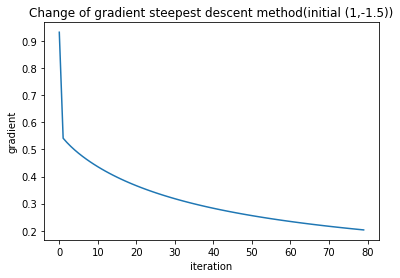

In [292]:
mm = range(len(vv3))
plt.plot(mm,vv3)
plt.title('Change of gradient steepest descent method(initial (1,-1.5))')
plt.xlabel('iteration')
plt.ylabel('gradient')
plt.savefig('no3log2.png')

In [10]:
xk = np.array([1.2,1.2])
c = 0.2
ro = 0.5
alpha = 1
pk = np.array([-dfx1(xk),-dfx2(xk)])
al = backtrack(xk, dfx1, dfx2,alpha, c, ro,pk)
al

0.0009765625

In [ ]:

graa = [7.192335063184594,
  6.699200128046181,
  6.2722064347314515,
  5.89985979016471,
  5.573027576182347,
  5.284386258927986,
  5.028008828965542,
  4.799057160877467,
  4.593551217638456,
  4.4081941424576625]


In [64]:
count = 1
c = 0.2
ro = 0.5
alpha = 1
precision = 0.000001
previous_step_size = 1
iters = 0
#it_max= 20
cur_x = np.array([1.2,1]) 
while previous_step_size > precision:
    prev_x = cur_x
    al = backtrack(prev_x, dfx1, dfx2,alpha, c, ro,count)
    cur_x = cur_x-al*np.array([dfx1(cur_x), dfx2(cur_x)])
    print(cur_x)
    previous_step_size = np.sqrt(np.sum(np.square(cur_x - prev_x))) #Change in x
    iters = iters + 1

###########################   iteration 1   ###########################
step length 0.5
###########################   iteration 2   ###########################
step length 0.25
###########################   iteration 3   ###########################
step length 0.125
###########################   iteration 4   ###########################
step length 0.0625
###########################   iteration 5   ###########################
step length 0.03125
###########################   iteration 6   ###########################
step length 0.015625
###########################   iteration 7   ###########################
step length 0.0078125
###########################   iteration 8   ###########################
step length 0.00390625
###########################   iteration 9   ###########################
step length 0.001953125
###########################   iteration 10   ###########################
step length 0.0009765625
[0.99335938 1.0859375 ]
###########################   iteration 1   ######

step length 0.125
###########################   iteration 4   ###########################
step length 0.0625
###########################   iteration 5   ###########################
step length 0.03125
###########################   iteration 6   ###########################
step length 0.015625
###########################   iteration 7   ###########################
step length 0.0078125
###########################   iteration 8   ###########################
step length 0.00390625
###########################   iteration 9   ###########################
step length 0.001953125
[1.00729564 1.01468792]
###########################   iteration 1   ###########################
step length 0.5
###########################   iteration 2   ###########################
step length 0.25
###########################   iteration 3   ###########################
step length 0.125
###########################   iteration 4   ###########################
step length 0.0625
###########################   iteration

[1.0042909  1.00862572]
###########################   iteration 1   ###########################
step length 0.5
###########################   iteration 2   ###########################
step length 0.25
###########################   iteration 3   ###########################
step length 0.125
###########################   iteration 4   ###########################
step length 0.0625
###########################   iteration 5   ###########################
step length 0.03125
###########################   iteration 6   ###########################
step length 0.015625
###########################   iteration 7   ###########################
step length 0.0078125
###########################   iteration 8   ###########################
step length 0.00390625
###########################   iteration 9   ###########################
step length 0.001953125
[1.00429415 1.00861576]
###########################   iteration 1   ###########################
step length 0.5
###########################   iterat

###########################   iteration 8   ###########################
step length 0.00390625
###########################   iteration 9   ###########################
step length 0.001953125
[1.00153221 1.00306939]
###########################   iteration 1   ###########################
step length 0.5
###########################   iteration 2   ###########################
step length 0.25
###########################   iteration 3   ###########################
step length 0.125
###########################   iteration 4   ###########################
step length 0.0625
###########################   iteration 5   ###########################
step length 0.03125
###########################   iteration 6   ###########################
step length 0.015625
###########################   iteration 7   ###########################
step length 0.0078125
###########################   iteration 8   ###########################
step length 0.00390625
###########################   iteration 9   #########

step length 0.0078125
###########################   iteration 8   ###########################
step length 0.00390625
###########################   iteration 9   ###########################
step length 0.001953125
[1.00094328 1.00188939]
###########################   iteration 1   ###########################
step length 0.5
###########################   iteration 2   ###########################
step length 0.25
###########################   iteration 3   ###########################
step length 0.125
###########################   iteration 4   ###########################
step length 0.0625
###########################   iteration 5   ###########################
step length 0.03125
###########################   iteration 6   ###########################
step length 0.015625
###########################   iteration 7   ###########################
step length 0.0078125
###########################   iteration 8   ###########################
step length 0.00390625
###########################   i

step length 0.5
###########################   iteration 2   ###########################
step length 0.25
###########################   iteration 3   ###########################
step length 0.125
###########################   iteration 4   ###########################
step length 0.0625
###########################   iteration 5   ###########################
step length 0.03125
###########################   iteration 6   ###########################
step length 0.015625
###########################   iteration 7   ###########################
step length 0.0078125
###########################   iteration 8   ###########################
step length 0.00390625
###########################   iteration 9   ###########################
step length 0.001953125
###########################   iteration 10   ###########################
step length 0.0009765625
[1.00057804 1.00115879]
###########################   iteration 1   ###########################
step length 0.5
[1.00047416 1.00092185]
##########

In [60]:
def mymin(x0,method):
    c = 0.2
    ro = 0.1
    precision = 0.000001
    it_max= 100
    cur_x = x0
    stop = 1
    alp_list = []
    x_list = []
    grad = []
    iters = 0
    #后面一个应该是小于吧
    while stop > precision and iters < it_max: 
        prev_x = cur_x
        alpha = 1
        if method == 'steepest descent':
            pk = -np.array([dfx1(prev_x),dfx2(prev_x)])
        elif method == 'newton':
            hessian = np.array([d2fx1(prev_x),d2fx1x2(prev_x),d2fx2x1(prev_x),d2fx2(prev_x)]).reshape((2,2))
            pk = -np.dot(np.linalg.inv(hessian),np.array([dfx1(prev_x),dfx2(prev_x)]))
        al = backtrack(prev_x, dfx1, dfx2,alpha, c, ro,pk)
        alp_list.append(al)
        cur_x = cur_x+al*pk
        #print(cur_x)
        stop = np.linalg.norm(np.array([dfx1(cur_x),dfx2(cur_x)]))
        grad.append(stop)
        iters = iters + 1
        #x values
        x_list.append(cur_x)
        
    return cur_x,grad,alp_list, x_list

In [58]:
mymin(np.array([-1.2,1]),method = 'newton')

(array([1.        , 0.99999999]),
 [4.639426214066872,
  20.407284544604973,
  22.062568444768758,
  9.853243617307683,
  20.8329995306218,
  3.2338560082104286,
  3.4254561510863812,
  3.3879206586226083,
  3.2895834162608466,
  3.165021034404544,
  3.0292332984875516,
  2.8901630718684177,
  2.752438405321965,
  2.618892540177432,
  2.491294125303167,
  2.370737050729682,
  2.257863776957801,
  2.1529997667405407,
  2.0562375698589284,
  1.9674914136430908,
  1.886534378885999,
  1.81302551524768,
  1.7465314735151622,
  1.6865454451241917,
  1.632504957552113,
  1.5838091811718427,
  1.5398357810149885,
  1.4999569641764101,
  1.4635542043662801,
  1.4300311303864444,
  1.3988241915125534,
  1.3694109006649942,
  1.3413156527321148,
  1.314113282238758,
  1.2874306415151886,
  1.2609465433620493,
  1.2343904276664173,
  1.2075400917321257,
  1.1802187825116186,
  1.1522918970164657,
  1.1236634835436239,
  1.094272686546703,
  1.064090234988421,
  1.0331150389460748,
  1.00137093200

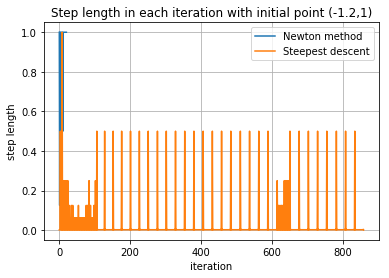

In [25]:
#step lengths
xx,gg,al_list,xl = mymin(np.array([-1.2,1]),method = 'newton')
xx2,gg2,al_list2,xl = mymin(np.array([-1.2,1]),method = 'steepest descent')
#plot step for newton 1.2,1.2
xa = range(len(al_list))
xa2 = range(len(al_list2))
plt.plot(xa,al_list,label = 'Newton method')
plt.plot(xa2,al_list2,label = 'Steepest descent')
plt.title('Step length in each iteration with initial point (-1.2,1)')
plt.xlabel('iteration')
plt.ylabel('step length')
plt.legend()
plt.grid(True)
plt.savefig('noh3_length2.png')

In [309]:
def find_convergence(method):
    #generate ini points
    mu = 0
    sigma = 2
    s = np.random.normal(mu, sigma, (100,2))
    gra_df = pd.DataFrame(np.zeros((100,3)),columns=['initial_x0','initial_x1','last_gradient'])
    #repeat 100 times for variant ini points
    for i in range(len(s)):
        if method == 'newton':
            r,gra,al_li,xl = mymin(s[i],method = 'newton')
        else:
            r,gra,al_li,xl = mymin(s[i],method = 'steepest descent')
        gra_df.iloc[i,0] = s[i][0]
        gra_df.iloc[i,1] = s[i][1]
        gra_df.iloc[i,2] = gra[len(gra)-1]
    #small to large
    gra_df.sort_values("last_gradient",inplace=True)
    #get 10%,50% and 90%
    p10a,p10b = gra_df.iloc[9,0:2]
    p50a,p50b = gra_df.iloc[49,0:2]
    p90a,p90b = gra_df.iloc[89,0:2]
    three = [np.array([p10a,p10b]),np.array([p50a,p50b]),np.array([p90a,p90b])]
    lab = ['top 10%','50%','90%']
    for i in range(3):
        if method == 'newton':
            r,gra,al_l,xl = mymin(three[i],method = 'newton')
        else:
            r,gra,al_l,xl = mymin(three[i],method = 'steepest descent')
        m = range(len(gra))
        print(gra)
        plt.plot(m,gra,label = lab[i])
        plt.legend()
        plt.title('Gradient change with initial points of 10%, 50% and 90% low minimum')
        plt.xlabel('number of iterations')
        plt.ylabel('log gradient')
        plt.yscale('log')
        #plt.savefig('noh3_step3.png')

[320.06970035002945, 188.29054738314608, 56.51576574242194, 1.4345370265586206, 1.2113892829192727, 1.0434096377696818, 0.9147323417007192, 0.8186009506224153, 0.7460007459411884, 0.6921273428003969, 1.2735089153694195, 1.1249972964864736, 1.0047135311228341, 0.9093393301741374, 0.8324156693682133, 0.771351427630285, 0.7221679303437266, 0.6829756639272746, 1.3324470128435941, 0.5213155755467642, 4.272417318398556, 0.8327053592285917, 0.5269009241711927, 0.3406530541606265, 0.22962607510836966, 0.16732202585542752, 0.13524256468832313, 0.20896334049243614, 0.1562654627834329, 0.12980760106167538, 0.19191308315797842, 0.14737395389666494, 0.2489977682532122, 0.1779553550776225, 0.14016082038086952, 0.22773576655557615, 0.16624538356505983, 0.1342354636083563, 0.20989870955664713, 0.15665777102640874, 0.12940696342730565, 0.19484293312206968, 0.14860551650688916, 0.25629346705097533, 0.18215536530244078, 0.14196273445361723, 0.23729042960881835, 0.17161146316977394, 0.1364567308167519, 0.

[18.652515377992, 3.4625597368753147, 0.7094902359187096, 0.4727477466331667, 0.3453485792641108, 0.2838344811859641, 0.4124378583606435, 0.3151736960641108, 0.5124028836842442, 0.3653121438789584, 0.29258954623690014, 0.4417301113728559, 0.32905069806970527, 0.5534695235824351, 0.3861317901978639, 0.30197389315962686, 0.47206664344303145, 0.34383870987155746, 0.2823021538377214, 0.4082239791592364, 0.31204411185720854, 0.5031267294282357, 0.35905129874931585, 0.28886293314974676, 0.4305297868619038, 0.322478093241014, 0.5345619934650415, 0.374867730898988, 0.29573198648823085, 0.4528890750648099, 0.33295315657559493, 0.5648130520956078, 0.38997580560827505, 0.3024291469336254, 0.4742865341713711, 0.34321780590910506, 0.28087416454845787, 0.40488592599009227, 0.30901677650692716, 0.49451164143549775, 0.3528079900636695, 0.2848380065140507, 0.41857215802262404, 0.3151793682700547, 0.5133038972378645, 0.36193896364996503, 0.2885670974086516, 0.4309968197875369, 0.3206626016827521, 0.5293

[946.3774950100312, 358.2942495324358, 26.556918056655668, 2.2926557244207326, 0.41763662158180626, 0.8153621160768533, 0.3635002871703096, 2.3936613697500118, 0.41909599260223024, 0.8254170636318898, 0.3625940627686622, 2.363401165620771, 0.4139487379748992, 0.7971056190745486, 0.3609732140111068, 2.2027548631182685, 0.403256941737712, 0.7348449358352169, 0.3588825279548555, 1.9353856696952376, 0.3896388694706056, 1.303407714515011, 0.3693076629378351, 1.7794376655590558, 0.38246680213230944, 1.178824520497202, 0.3652547517529392, 1.5695523612132534, 0.3745030062769375, 1.02653925076716, 0.3611646772779688, 1.3292172325199083, 0.3669885434481683, 1.7183659093968213, 0.3764499167693646, 1.0814083580602154, 0.36073580203983246, 1.356758442032699, 0.3657800893665843, 1.6935947623554377, 0.3733276406762284, 1.031215719257616, 0.35839572261147945, 2.489991704842609, 0.39533700576509134, 0.6992191683969504, 0.35275057711921914, 3.0320305243580736, 0.40784776466519024, 0.7763669957066524, 0.

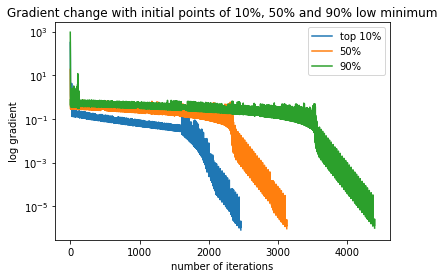

In [310]:
find_convergence(method = 'steepest secent')

In [92]:
r,gra,ali,ll = mymin(np.array([1.2,1.2]),method = 'newton')
r2,gra2,ali2,ll2 = mymin(np.array([1.2,1.2]),method = 'steepest descent')
hou = ll[1:]
qian = ll[:len(ll)-1]
hou2 = ll2[1:]
qian2 = ll2[:len(ll2)-1]

In [93]:
fenzi = hou-r
fenzi2 = hou2-r2

In [94]:
fenzi = np.linalg.norm(fenzi, axis = 1)
fenzi2 = np.linalg.norm(fenzi2, axis = 1)

In [95]:
fenmu = qian-r
fenmu = np.linalg.norm(fenmu, axis = 1)
fenmu2 = qian2-r2
fenmu2 = np.linalg.norm(fenmu2, axis = 1)

In [96]:
bizhi = fenzi/fenmu
bizhi2 = fenzi2/fenmu2

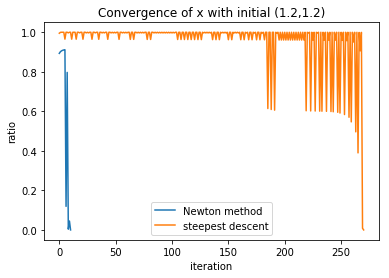

In [97]:
x = range(len(bizhi))
x2 = range(len(bizhi2))
plt.plot(x,bizhi, label = 'Newton method')
plt.plot(x2,bizhi2,label = 'steepest descent')
#plt.yscale('log')
plt.title('Convergence of x with initial (1.2,1.2)')
plt.xlabel('iteration')
plt.ylabel('ratio')
plt.legend()
plt.savefig('noh3_con6.png')

In [ ]:
#纵轴为梯度模长，横轴迭代次数，三条线表示10%，50%，90%的最终梯度值 对应的起始点的梯度下降线

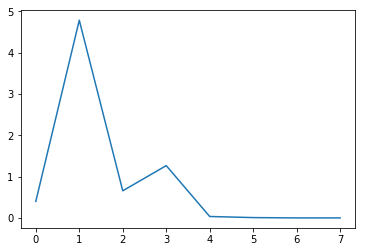

In [217]:
m = range(len(gra))
plt.plot(m,gra)

In [233]:
#random initial starting points
from numpy.linalg import cholesky
#sampleNo = 100;
mu = 0
sigma = 2
np.random.seed(0)
s = np.random.normal(mu, sigma, (100,2) )
#plt.hist(s,100,normed=True)
s[0]

array([3.52810469, 0.80031442])

In [237]:
#newton
import pandas as pd
gra_df = pd.DataFrame(np.zeros((100,3)),columns=['initial_x0','initial_x1','last_gradient'])
#gra_df
for i in range(len(s)):
    r,ll,gra = mymin(s[i],method = 'newton')
    gra_df.iloc[i,0] = s[i][0]
    gra_df.iloc[i,1] = s[i][1]
    gra_df.iloc[i,2] = gra[len(gra)-1]


In [241]:
gra_df.sort_values("last_gradient",inplace=True)
gra_df

,initial_x0,initial_x1,last_gradient
5,0.288087,2.908547,4.888210e-14
83,-2.000431,-3.089542,6.601861e-14
25,-1.790933,0.773805,6.832374e-14
15,0.309895,0.756325,7.568302e-14
86,1.713661,-1.302051,1.544058e-13
82,-2.450871,1.688726,3.173719e-13
45,-0.806354,2.444890,5.998256e-13
36,2.278801,-2.469652,6.233660e-13
67,-1.271692,1.352867,7.362115e-13
98,1.543581,1.647008,8.596195e-13


In [250]:
#get 10%,50% and 90%
p10a,p10b = gra_df.iloc[9,0:2]
p50a,p50b = gra_df.iloc[49,0:2]
p90a,p90b = gra_df.iloc[89,0:2]
three = [np.array([p10a,p10b]),np.array([p50a,p50b]),np.array([p90a,p90b])]

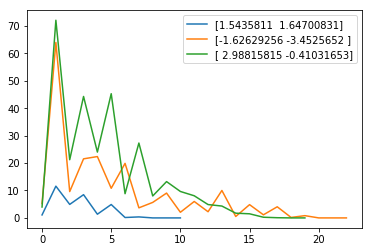

In [254]:

for i in three:
    r,ll,gra = mymin(i,method = 'newton')
    m = range(len(gra))
    plt.plot(m,gra,label = str(i))
    plt.legend()

In [ ]:
def find_convergence()